In [7]:
import numpy as np
import scipy.spatial
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [3]:
match_rep_df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope-analysis/checkpoints/match_rep_df.csv")

In [47]:

# Convert string settings to numerical

def get_similar_rows(df, row_index, threshold, ignore_cols):
    """
    For a given profile, find the most similar other rows based 
    on Euclidean distance. Rows above the threshold will be discarded

    DataFrame strings will be converted to numerical 

    ignore_cols will not be used for calculating distance, but will be returned in the final
    output 
    """
    data = df.copy()
    numerical_df = pd.DataFrame()

    data_dropped = data.drop(ignore_cols, axis=1)

    lab = LabelEncoder()
    # Convert settings to be compared to categorical values
    for col in data_dropped.columns:
        lab.fit(data_dropped[col])
        numerical_df[col] = lab.transform(data_dropped[col])

    distances = scipy.spatial.distance.cdist(numerical_df, numerical_df, metric='euclidean')

    row = np.where(distances[row_index] > threshold, distances[row_index], 0)

    # Find indices of rows that have a distance below the threshold
    ind = np.argwhere(row==0).reshape(-1)

    # Get the relative distances for output
    comparison_distances = distances[row_index][ind]

    # Subset the data to have rows that are below the distance threshold
    data = data.iloc[ind,:]

    data["euclidean_distance"] = comparison_distances

    data = data.sort_values(by=["euclidean_distance"])

    return data

df = match_rep_df[
    (~match_rep_df["Batch"].str.contains("siteSub")) &
    (match_rep_df["sphering"] == True)
].reset_index()

comparison_cols = [
    "aperture",
    "Magnification",
    "Modality",
    "Binning",
    "Number_of_channels",
    "z_plane",
    "spinning-disc",
    "dry-immersion",
    "vs-brightfield",
    "simultaneous-excitation",
    "sites",
]

drop_cols = [i for i in df.columns if i not in comparison_cols]

display_cols = ["Vendor", "Assay_Plate_Barcode", "Batch"] + comparison_cols + ["euclidean_distance"]

get_ind = df.index[df["Assay_Plate_Barcode"].str.contains("BRO0117056_20xb")][0]

get_similar_rows(df, get_ind, 3, drop_cols)[display_cols]
# get_similar_rows(df, 25, 5, str_convert, drop_cols)[display_cols]

,Vendor,Assay_Plate_Barcode,Batch,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites,euclidean_distance
50,Yokogawa_US,BRO0117056_20xb,Scope1_Yokogawa_US_20X_5Ch_12Z,1.0,20,Confocal,1,5,12,NaN,water,no,2.0,9,0.000000
51,Yokogawa_US,BRO0117059_20X,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,1.0,20,Confocal,1,6,12,NaN,water,yes,4.0,9,1.732051
52,Yokogawa_US,BRO01177034_20x,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,1.0,20,Confocal,1,6,12,NaN,water,yes,4.0,9,1.732051
53,Yokogawa_US,BRO0117059_40x,Scope1_Yokogawa_US_40X_BRO0117059,1.0,40,Confocal,1,6,12,NaN,water,yes,4.0,9,2.000000
48,Yokogawa_US,BRO0117033_20xb,Scope1_Yokogawa_US_20X_5Ch,1.0,20,Confocal,1,5,1,NaN,water,no,2.0,9,3.000000
49,Yokogawa_US,BRO0117056_20x,Scope1_Yokogawa_US_20X_5Ch,1.0,20,Confocal,1,5,1,NaN,water,no,2.0,9,3.000000


<AxesSubplot:>

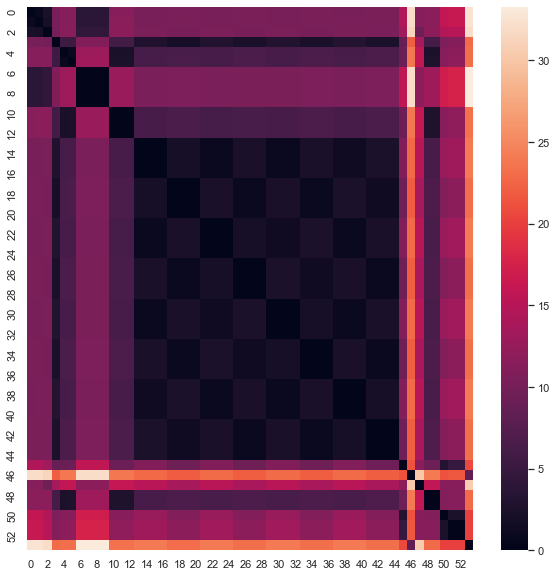

In [8]:
setting_df = df[comparison_cols]

numerical_df = to_numerical(setting_df, str_convert)

comparison = scipy.spatial.distance.cdist(numerical_df, numerical_df)

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(comparison, ax=ax)

In [33]:
numerical_df = to_numerical(setting_df, str_convert)
numerical_df

lab = LabelEncoder()
for col in numerical_df.columns:
    print(col)
    lab.fit(numerical_df[col])
    numerical_df[col] = lab.transform(numerical_df[col])

numerical_df

aperture
Magnification
Modality
Binning
Number_of_channels
z_plane
spinning-disc
dry-immersion
vs-brightfield
simultaneous-excitation
sites


,aperture,Magnification,Modality,Binning,Number_of_channels,z_plane,spinning-disc,dry-immersion,vs-brightfield,simultaneous-excitation,sites
0,1,0,0,0,2,0,0,0,0,0,3
1,1,0,0,0,2,0,1,0,0,0,3
2,1,0,0,0,2,1,1,0,0,0,3
3,2,1,0,0,2,1,1,0,0,0,3
4,2,1,0,0,2,0,0,0,0,0,4
5,2,1,0,0,2,0,1,0,0,0,4
6,1,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,0


In [37]:
lab = LabelEncoder()
lab.fit(numerical_df)
numerical_df = lab.transform(numerical_df)
numerical_df

ValueError: y should be a 1d array, got an array of shape (54, 11) instead.

In [27]:
s = pd.Series([1, 2, 3, 4, 4, 3, 2, 1])
pd.cut(s, bins=[1,2,3,4, 5], labels=[1,2,3,6])

0    NaN
1      1
2      2
3      3
4      3
5      2
6      1
7    NaN
dtype: category
Categories (4, int64): [1 < 2 < 3 < 6]

[1 2 3 4]


array([0, 1, 2, 3, 3, 2, 1, 0])